# Recontruir la sensibilidad espectral de una cámara

**Autor:** @eti-calde on Github - Etienne Calderón

# Contexto
**¿Qué es la sensiblidad espectral?**

La capacidad de la cámara para capturar luz en diferentes longitudes de onda del espectro electromagnético, es decir, cómo responde la cámara a la luz de diferentes colores o frecuencias.

**¿Como reconstuir la sensibilidad espectral de la cámara?**

1. Emitiendo luz en **longuitudes de onda** ($\lambda$) e **intesidades** ($I$) conocidas, gracias a la ayuda de un **(nombre del aparato)**.
2. Sacando fotos en una grilla de longuitudes e intensidades distintas.

## Importar librerias

In [1]:
import rawpy
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Cargando 1 imagen

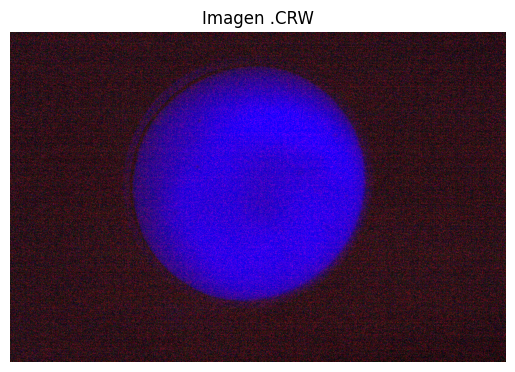

In [8]:
# Ruta de la imagen .CRW
ruta_imagen = 'images/CRW_8889.CRW'

# Abrir la imagen .CRW con rawpy
with rawpy.imread(ruta_imagen) as raw:
    # Obtener la imagen procesada en formato RGB
    imagen_rgb = raw.postprocess()

# Mostrar la imagen
plt.imshow(imagen_rgb)
plt.title('Imagen .CRW')
plt.axis('off')
plt.show()

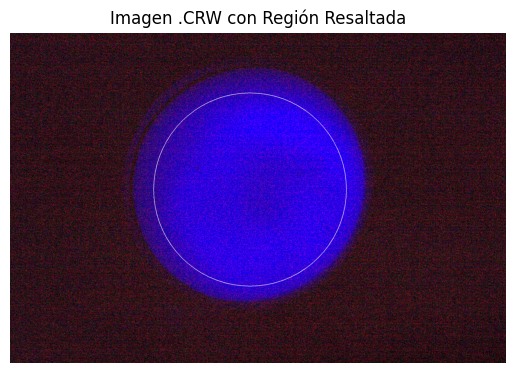

Promedio de color dentro del circulo: [48.693530555555554, 3.836701388888889, 202.59072430555557]


In [9]:
# Coordenadas del centro del círculo
centro_x = imagen_rgb.shape[1] // 2 - 50
centro_y = imagen_rgb.shape[0] // 2 - 50

radio = 600

# Crear una copia de la imagen
imagen_resaltada = imagen_rgb.copy()

# Dibuja un círculo o una región rectangular resaltada
cv2.circle(imagen_resaltada, (centro_x, centro_y), radio, (255, 255, 255), 2) 

# Muestra la imagen con la región resaltada
plt.imshow(imagen_resaltada)
plt.title('Imagen .CRW con Región Resaltada')
plt.axis('off')
plt.show()

# Calcula el promedio de color en la región circular
region_circular = imagen_rgb[centro_y - radio:centro_y + radio, centro_x - radio:centro_x + radio]
promedio_color = [np.mean(region_circular[:, :, i]) for i in range(3)]
# print('region circular:',region_circular)
print('Promedio de color dentro del circulo:', promedio_color)